In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import qmc
from scipy import stats
import sympy
import scipy.stats as st 

In [2]:
def mandelbrot_iterations(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

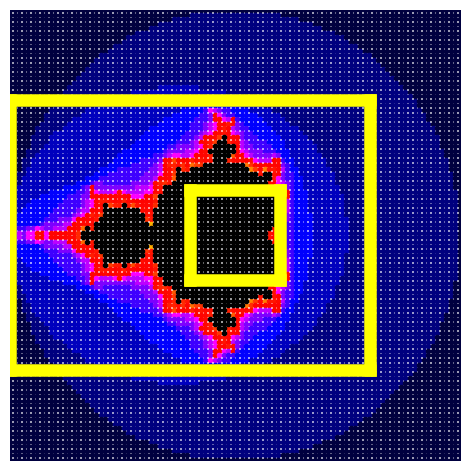

In [155]:

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x, y)

complex_grid = x_grid - y_grid * 1j
max_iterations = 201

c_list_in_x = []
c_list_in_y = []

c_list_out_x = []
c_list_out_y = []
color_out = []
for c_row in complex_grid:
    for c in c_row:
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            c_list_in_x.append(c.real)
            c_list_in_y.append(c.imag)
        else:
            percentage_diverge = (n/max_iterations)*100
            c_list_out_x.append(c.real)
            c_list_out_y.append(c.imag)
            color_out.append(percentage_diverge)

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 3, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 3, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 3, color = (1,(color_out[i]-4)/96,0))
    
a = -2+1/5*4
b = 2-1/5*4
c = -2+2/5*4
d = 2-2/5*4
punt1 = [-2+1/5*4, -2+1/5*4] 
punt2 = [-2+1/5*4, 2-1/5*4]
punt3 = [2-1/5*4, -2+1/5*4]
punt4 = [2-1/5*4, 2-1/5*4]
punt5 = [-2+2/5*4, -2+2/5*4] 
punt6 = [-2+2/5*4, 2-2/5*4]
punt7 = [2-2/5*4, -2+2/5*4]
punt8 = [2-2/5*4, 2-2/5*4]

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 3, color = (0,0,0))
plt.plot([-2,-2],punt2, c='yellow', linewidth=9) # links buiten
plt.plot(punt4, punt3, c='yellow', linewidth=9) # rechts buiten
plt.plot([-2, 2-1/5*4], punt4, c='yellow', linewidth=9) # boven buiten
plt.plot([-2, 2-1/5*4], punt1, c='yellow', linewidth=9) # onder buiten
plt.plot(punt5,punt6, c='yellow', linewidth=9)
plt.plot(punt8, punt7, c='yellow', linewidth=9)
plt.plot(punt6, punt8, c='yellow', linewidth=9)
plt.plot(punt7, punt5, c='yellow', linewidth=9)
# plt.plot(punt4,punt2, c='orange')
# plt.plot(punt4,punt3, c='red')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

## Code from code.ipynb

In [3]:
def random_sampling(samples, visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    c_list = []
    x_list, y_list = [], []

    for s in range(1, samples):
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        x_list.append(x)
        y_list.append(y)
        c = x - y * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list
    

def hypercube_or_ortho(samples, sample_type = 'hyper', visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    if sample_type == 'hyper':
        sampler = qmc.LatinHypercube(d = 2)    
    elif sample_type == 'ortho':
        sampler = qmc.LatinHypercube(d = 2, strength = 2)

    sample = sampler.random(n = samples)
    l_bounds = [xmin, ymin]
    u_bounds = [xmax, ymax]
    sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
    x_list = sample_scaled[:, 0]
    y_list = sample_scaled[:, 1]
    
    c_list = []
    for ax in range(len(x_list)):
        c = x_list[ax] - y_list[ax] * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list
    
def area_mandelbrot(max_iter, samples_raw, runs, sampling_type = 'random', visual = 'no', tot_area=16):
    if sampling_type == 'random_test':
        samples = samples_raw + 1
    else:
        for s in sympy.primerange(0, np.sqrt(samples_raw)):
            if s**2 < samples_raw:
                samples = s**2 + 1
        # print(samples-1)
    area_runs = []
    for r in range(runs):
        in_num = 0
        if sampling_type == 'random' or 'random_test':
            if visual == 'visualise':
                c_list, x_list, y_list = random_sampling(samples, 'visualise')
            else:
                c_list = random_sampling(samples)
        elif sampling_type == 'hyper':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'hyper', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples)
        elif sampling_type == 'ortho':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'ortho', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples, 'ortho')
        
        for c in c_list:
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                in_num += 1
        area_runs.append((in_num/samples)*tot_area)

    area = np.mean(area_runs)
    std = np.std(area_runs)
    if visual == 'visualise':
        return area, std, x_list, y_list
    else:
        return area, std, area_runs




### Pixel counting with 10000x10000 points

In [4]:
pixel_counting_area = 1.52580928

## Importance sampling with skewed blocklines

In [5]:
# skewed bocklines
def importance_sampling(max_iter,samples,xmin=-2, xmax=2, ymin=-2, ymax=2):
    len_x, len_y = abs(xmin)+abs(xmax), abs(ymin)+abs(ymax)
    tot_area = len_x*len_y

    block1_in, block1_out, block2_in, block2_out, block3_in, block3_out = 0,0,0,0,0,0
    for _ in range(samples):
        block = np.random.uniform()
        if block<=0.2:
            x = np.random.uniform(xmin, xmax)
            if (x>= xmax-1/5*len_x): #(x <= xmin + 1/5*len_x) or 
                y = np.random.uniform(ymin, ymax)
            else:
                y = np.random.choice([np.random.uniform(ymin, ymin + 1/5*len_y), np.random.uniform(ymax-1/5*len_y, ymax)])
            c = x + 1j*y 
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                block3_in += 1
            else:
                block3_out += 1
        elif block<=0.9:
            x = np.random.uniform(xmin, xmax - 1/5*len_x) # xmin + 1/5*len_x
            if (x <= xmin + 2/5*len_x) or (x>= xmax-2/5*len_x):
                y = np.random.uniform(ymin+1/5*len_y, ymax-1/5*len_y)
            else:
                y = np.random.choice([np.random.uniform(ymin+1/5*len_y, ymin + 2/5*len_y), np.random.uniform(ymax-2/5*len_y, ymax-1/5*len_y)])
            c = x + 1j*y 
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                block2_in += 1
            else:
                block2_out += 1
        else:
            x = np.random.uniform(xmin + 2/5*len_x, xmax - 2/5*len_x)
            y = np.random.uniform(ymin + 2/5*len_y, ymax - 2/5*len_y)
            c = x + 1j*y 
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                block1_in += 1
            else:
                block1_out += 1
    if (block1_in+block1_out)==0:
        block1 = 0
    else:
        block1 = (block1_in/(block1_in+block1_out))*1/25

    if (block2_in+block2_out)==0:
        block2 = 0
    else:
        block2 = (block2_in/(block2_in+block2_out))*11/25   # 8/25

    if (block3_in+block3_out)==0:
        block3 = 0
    else:
        block3 = (block3_in/(block3_in+block3_out))*13/25  #16/25


    area = (block1 + block2 + block3)*tot_area
    return area


In [8]:
def area_mandelbrot_importance(max_iter, samples, runs, xmin=-2, xmax=2, ymin=-2, ymax=2):
    area_runs = []
    for _ in range(runs):
        area_runs.append(importance_sampling(samples,max_iter))
    area = np.mean(area_runs)
    std = np.std(area_runs)
    return area, std, area_runs

# importance sampling test area
print(area_mandelbrot_importance(200,200,100))
# random sampling test area
print(area_mandelbrot(200,200,100, 'random_test'))
# real area from pixel counting
print(pixel_counting_area)

(1.6094680777995802, 0.1953459188990018, [1.6648101265822786, 1.8137931034482757, 1.5483229813664596, 1.6126315789473686, 1.3611100832562442, 1.7978947368421054, 1.5703021582733814, 1.528888888888889, 1.7128073916133615, 1.5903678929765888, 1.4083890577507598, 2.0670270270270272, 1.6296296296296298, 1.5265185185185186, 1.4332394366197185, 1.7872592592592595, 1.4166755017038999, 1.9297709923664121, 1.3013333333333335, 1.6246153846153848, 1.2557241379310344, 1.514248366013072, 1.486315789473684, 1.5331314354936403, 1.4921739130434784, 1.76, 1.7394616977225672, 1.8383448275862069, 1.32, 1.52, 1.1944811594202898, 1.6246153846153848, 1.7166045548654243, 1.6883397683397683, 1.4432, 1.661068702290076, 1.6246153846153848, 1.6023021582733814, 1.4332394366197185, 1.8534881149806521, 1.527843137254902, 1.3668814513606506, 1.645714285714286, 1.7043478260869565, 1.4512244008714597, 1.6246153846153848, 1.693605442176871, 2.023401360544218, 1.9063622526636226, 1.751578947368421, 1.4865185185185186, 1

### difference funtions

In [6]:

def interations_diffs(iterations,samplesize, type_sampling, runs=1000):
    j_list = []
    for j in range(6, iterations, 10):
        j_list.append(j)

    total = area_mandelbrot(j_list[-1],samplesize,runs, sampling_type = type_sampling)[0]
    diffs = []
    std_list = []
    area_runs_list = []
    for j in j_list:
        area, std, area_runs = area_mandelbrot(j, samplesize, runs, sampling_type = type_sampling)
        diffs.append(abs(total-area))
        std_list.append(std)
        area_runs_list.append(area_runs)
    return j_list, diffs, std_list, area_runs_list, total

def sampling_diffs(samples, iterationsize, type_sampling, runs=1000):
    z_list = []
    for z in range(100, samples, 100):
        z_list.append(z)

    total = area_mandelbrot(iterationsize,z_list[-1],runs, sampling_type = type_sampling)[0]
    diffs = []
    std_list = []
    area_runs_list = []
    for z in z_list:
        area, std, area_runs = area_mandelbrot(iterationsize, z, runs, sampling_type = type_sampling)
        diffs.append(abs(total-area))
        std_list.append(std)
        area_runs_list.append(area_runs)
        
    return z_list, diffs, std_list, area_runs_list, total

def interations_diffs_importance(iterations,samplesize, runs=1000):
    j_list = []
    for j in range(6, iterations, 10):
        j_list.append(j)

    total = area_mandelbrot_importance(j_list[-1],samplesize,runs)[0]
    diffs = []
    std_list = []
    area_runs_list = []
    for j in j_list:
        area, std, area_runs = area_mandelbrot_importance(j, samplesize, runs)
        diffs.append(abs(total-area))
        std_list.append(std)
        area_runs_list.append(area_runs)
    return j_list, diffs,std_list, area_runs_list, total

def sampling_diffs_importance(samples, iterationsize, runs=1000):
    z_list = []
    for z in range(100, samples, 100):
        z_list.append(z)

    total = area_mandelbrot_importance(iterationsize,z_list[-1],runs)[0]
    diffs = []
    std_list = []
    area_runs_list = []
    for z in z_list:
        area, std, area_runs = area_mandelbrot_importance(iterationsize, z, runs)
        diffs.append(abs(total-area))
        std_list.append(std)
        area_runs_list.append(area_runs)
        
    return z_list, diffs, std_list, area_runs_list, total

# iterations

In [9]:
# Duration: 4m23s
# Sizes and fixed sizes of iterations and samples
samples = 1001
iterations = 301
# np.random.seed(48)
type_sampling_list = ['random', 'hyper', 'ortho']
samplesize = 200
iterationsize = 200

# Convergence of iterations
np.random.seed(3)

j_list_random, diffs_random, std_list_random, area_runs_list_random, total_random = interations_diffs(iterations, samplesize, "random")
j_list_hyper, diffs_hyper, std_list_hyper, area_runs_list_hyper, total_hyper = interations_diffs(iterations, samplesize, "hyper")
j_list_ortho, diffs_ortho, std_list_ortho, area_runs_list_ortho, total_ortho = interations_diffs(iterations, samplesize, "ortho")
j_list_imp, diffs_imp, std_list_imp, area_runs_list_imp, total_imp = interations_diffs_importance(iterations, samplesize)



In [11]:


def confidence_intervals_95_area_runs(area_runs_list, total, importance=False):
    lower_bounds = []
    upper_bounds = []
    means = []
    total = np.mean(area_runs_list[-1])
    print(total)
    for run in area_runs_list:
        mean = np.mean(run)
        l, u = st.t.interval(confidence=0.95, df=len(run)-1, loc=mean, scale=st.sem(run))
        lower_bounds.append(l)
        upper_bounds.append(u)
        means.append(mean)
    print(means[-1])
    if importance:
        return (total-np.array(means)), (total-np.array(lower_bounds)), (total-np.array(upper_bounds))
    return (np.array(means)-total), (np.array(lower_bounds)-total), (np.array(upper_bounds)-total)


# print(len(area_runs_list_imp))
# print(np.mean(area_runs_list_imp[0]))
# print(diffs_imp[0])
# print(np.mean(total_imp-area_runs_list_imp[0]))

# data = area_runs_list_imp[0]

# # create 95% confidence interval 
# st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

# # confidence_intervals_95_area_runs(area_runs_list_imp, total_imp)


1.5035294117647058
1.5035294117647058
1.5020235294117648
1.5020235294117648
1.5204705882352942
1.5204705882352942
1.6196929288903175
1.6196929288903175


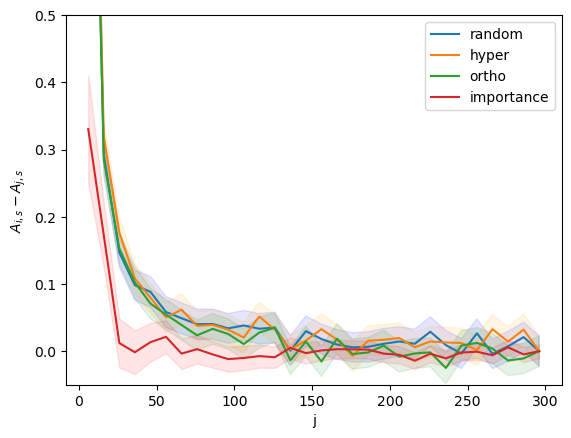

In [12]:
meanr, lr, ur = confidence_intervals_95_area_runs(area_runs_list_random, total_random)
meanh, lh, uh = confidence_intervals_95_area_runs(area_runs_list_hyper, total_hyper)
meano, lo, uo = confidence_intervals_95_area_runs(area_runs_list_ortho, total_ortho)
meani, li, ui = confidence_intervals_95_area_runs(area_runs_list_imp, total_imp, importance=True)


plt.plot(j_list_random, meanr, label = f"random")
plt.fill_between(j_list_random, lr, ur, color='b', alpha=.1)
# plt.show()
plt.plot(j_list_hyper, meanh, label = f"hyper")
plt.fill_between(j_list_hyper, lh, uh, color='orange', alpha=.1)
# plt.show()
plt.plot(j_list_ortho, meano, label = f"ortho")
plt.fill_between(j_list_ortho, lo, uo, color='green', alpha=.1)
# plt.show()
plt.plot(j_list_imp, meani, label = f"importance")
plt.fill_between(j_list_imp, li, ui, color='red', alpha=.1)
# plt.show()
plt.legend()
plt.ylabel('$A_{i,s} - A_{j,s}$')
plt.xlabel('j')
plt.ylim(-0.05,0.5)
# plt.xlim(0, 300)
# plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.show()

### samples

In [138]:
# Duration: 10m
# Sizes and fixed sizes of iterations and samples
samples = 1001
iterations = 501
# np.random.seed(48)
type_sampling_list = ['random', 'hyper', 'ortho']
samplesize = 200
iterationsize = 200

# Convergence of iterations
np.random.seed(3)

z_list_random, diffs_random, std_list_random, area_runs_list_random, total_random = sampling_diffs(samples, iterationsize, "random")
z_list_hyper, diffs_hyper, std_list_hyper, area_runs_list_hyper, total_hyper = sampling_diffs(samples, iterationsize, "hyper")
z_list_ortho, diffs_ortho, std_list_ortho, area_runs_list_ortho, total_ortho = sampling_diffs(samples, iterationsize, "ortho")
z_list_imp, diffs_imp, std_list_imp, area_runs_list_imp, total_imp = sampling_diffs_importance(samples, iterationsize)

1.5252723492723494
1.5252723492723494
1.5295301455301455
1.5295301455301455
1.5324906444906445
1.5324906444906445
1.607516036134662
1.607516036134662


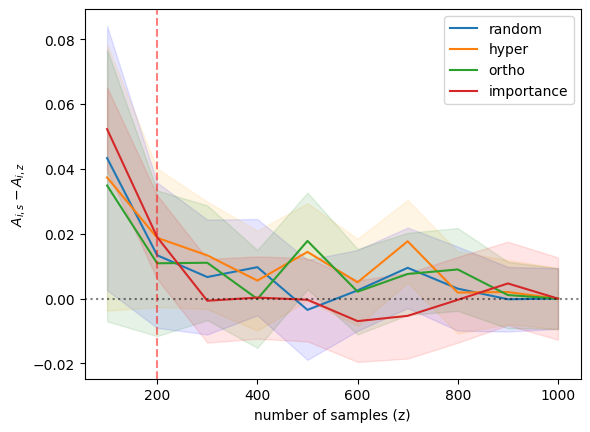

In [144]:
meanr, lr, ur = confidence_intervals_95_area_runs(area_runs_list_random, total_random, importance=True)
meanh, lh, uh = confidence_intervals_95_area_runs(area_runs_list_hyper, total_hyper, importance=True)
meano, lo, uo = confidence_intervals_95_area_runs(area_runs_list_ortho, total_ortho, importance=True)
meani, li, ui = confidence_intervals_95_area_runs(area_runs_list_imp, total_imp)


plt.plot(z_list_random, meanr, label = f"random")
plt.fill_between(z_list_random, lr, ur, color='b', alpha=.1)
# plt.show()
plt.plot(z_list_hyper, meanh, label = f"hyper")
plt.fill_between(z_list_hyper, lh, uh, color='orange', alpha=.1)
# plt.show()

plt.plot(z_list_ortho, meano, label = f"ortho")
plt.fill_between(z_list_ortho, lo, uo, color='green', alpha=.1)
# plt.show()
plt.plot(z_list_imp, meani, label = f"importance")
plt.fill_between(z_list_imp, li, ui, color='red', alpha=.1)
# plt.show()
plt.legend()
plt.ylabel('$A_{i,s} - A_{i,z}$')
plt.xlabel('number of samples (z)')
# plt.ylim(-0.5,0.5)
# plt.xlim(0, 300)
plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.axhline(y = 0, color = 'black', linestyle = ':', alpha = 0.5)
plt.show()


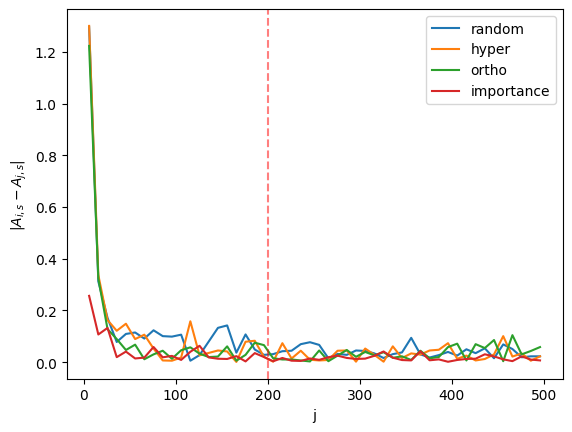

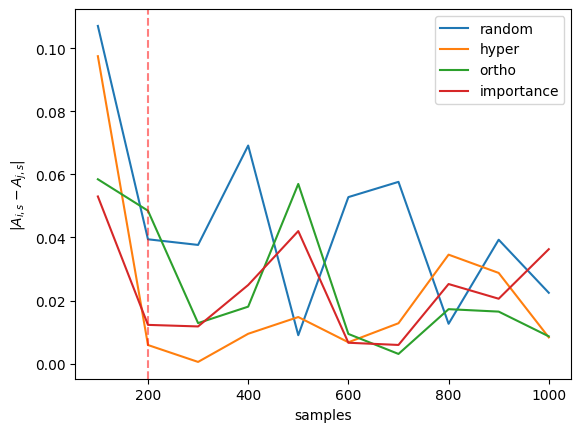

In [23]:
# Sizes and fixed sizes of iterations and samples
samples = 1001
iterations = 501
# np.random.seed(48)
type_sampling_list = ['random', 'hyper', 'ortho']
samplesize = 200
iterationsize = 200

# Convergence of iterations
np.random.seed(3)
for sampling_type in type_sampling_list:
    j_list, diffs, _,_,_ = interations_diffs(iterations, samplesize, sampling_type)
    plt.plot(j_list, diffs, label = f"{sampling_type}")
j_list_imp, diffs_imp,_,_,_ = interations_diffs_importance(iterations, samplesize)
plt.plot(j_list_imp, diffs_imp, label = f"importance")
plt.legend()
plt.ylabel('$|A_{i,s} - A_{j,s}|$')
plt.xlabel('j')
plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.show()

# Convergence of samplesize
np.random.seed(3)
for sampling_type in type_sampling_list:
    z_list, diffs,_,_,_ = sampling_diffs(samples, iterationsize, sampling_type)
    plt.plot(z_list, diffs, label = f"{sampling_type}")
z_list_imp, diffs_imp,_,_,_ = sampling_diffs_importance(samples, iterationsize)
plt.plot(z_list_imp, diffs_imp, label = f"importance")
plt.legend()
plt.ylabel('$|A_{i,s} - A_{j,s}|$')
plt.xlabel('samples')
plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.show()